In [1]:

from sklearn.model_selection import train_test_split
import pandas as pd

#Load your data (replace with your actual data loading)
df = pd.read_csv("train.csv")

# remove all NAs in the outcome column
df = df[df['$target'].notna()]

# Split into 70% train, 30% test
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

# Verify
print(f"Train: {len(df_train)} samples | Test: {len(df_test)} samples")

# Save (optional)
df_train.to_csv("train_data.csv", index=False)
df_test.to_csv("test_data.csv", index=False)

Train: 52230663 samples | Test: 22384570 samples


In [2]:
 import pandas as pd

df = pd.read_csv("train_data.csv")


## Starting with all missing values removed

In [6]:

# Example DataFrame
# df = pd.read_csv('your_file.csv')  # or define your df here
df_cleaned = df.dropna()

# Create a summary of missing values
missing_summary = pd.DataFrame({
    'Missing Count': df_cleaned.isnull().sum(),
    'Missing %': df_cleaned.isnull().mean() * 100
})

# Filter to only show columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

# Optional: sort by % missing
missing_summary = missing_summary.sort_values(by='Missing %', ascending=False)

print(missing_summary)
print(df_cleaned.head)


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []
<bound method NDFrame.head of                 date      time      code   $change    $close     $high  \
0         2020-10-28  13:18:00  SH603136 -0.001110  1.422100  1.422627   
1         2020-11-03  14:19:00  SH603936  0.000000  2.487894  2.487894   
2         2021-01-15  10:57:00  SZ002750 -0.002235  1.808039  1.812089   
3         2021-02-26  09:39:00  SH600257 -0.002146  2.882646  2.888845   
4         2020-10-22  10:46:00  SZ300669 -0.005383  2.961569  2.977598   
...              ...       ...       ...       ...       ...       ...   
73108387  2020-10-12  13:12:00  SZ002899 -0.004557  0.667918  0.670539   
73108388  2020-10-22  14:08:00  SZ002743  0.000000  1.615074  1.615074   
73108389  2020-12-14  13:02:00  SZ300227 -0.002822  3.559865  3.566582   
73108390  2020-12-14  10:46:00  SH600237  0.004158  1.326462  1.326462   
73108391  2020-12-25  13:27:00  SZ300325  0.000000  1.660127  1.666322   

              $low 

In [13]:
num_unique_codes = df_cleaned['code'].nunique()
print(f"Number of unique stock codes: {num_unique_codes}")
print(df_cleaned.shape)

Number of unique stock codes: 3959
(52229677, 10)


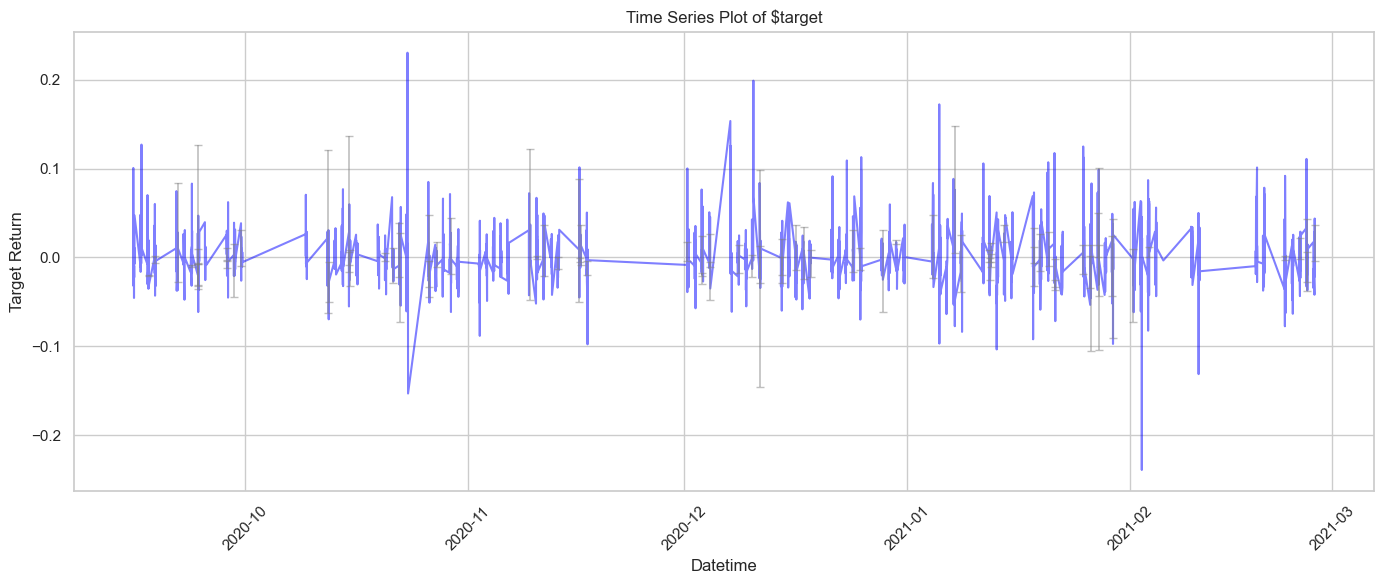

<bound method NDFrame.head of                 date      time      code   $change     $close      $high  \
33675011  2020-09-15  09:31:00  SZ000993 -0.001541   3.607814   3.613382   
54602728  2020-09-15  09:31:00  SH601808  0.000000   0.338561   0.339428   
70627353  2020-09-15  09:31:00  SZ000659  0.000000   1.269810   1.269810   
66669998  2020-09-15  09:31:00  SZ300401  0.003950   7.664994   7.670020   
65526374  2020-09-15  09:31:00  SZ300334  0.004111   0.686156   0.690370   
...              ...       ...       ...       ...        ...        ...   
55476732  2021-02-26  14:57:00  SH600206  0.000000   5.923438   5.923438   
11920681  2021-02-26  14:57:00  SZ300421 -0.001178   1.028352   1.029565   
46450490  2021-02-26  14:57:00  SZ300641  0.001506   0.683526   0.683526   
51420140  2021-02-26  14:57:00  SH600756  0.000000   1.587862   1.587862   
35318146  2021-02-26  14:57:00  SZ000656  0.001295  10.000656  10.000656   

               $low      $open       $volume   $target   

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulate dummy data with separate date and time
np.random.seed(0)
n = 300

# Random dates (e.g., 3 days)
# dates = pd.date_range("2025-06-20", periods=3).strftime("%Y-%m-%d")
# times = pd.date_range("09:30", "16:00", freq="5min").strftime("%H:%M:%S")
# date_col = np.random.choice(dates, size=n)
# time_col = np.random.choice(times, size=n)

# df = pd.DataFrame({
#     'date': date_col,
#     'time': time_col,
#     '$target': np.random.normal(loc=0, scale=0.02, size=n)
# })

# # 2. Combine date and time into a full datetime
df_cleaned['datetime'] = pd.to_datetime(df_cleaned['date'] + ' ' + df_cleaned['time'])

# 3. Sort by datetime
df_cleaned = df_cleaned.sort_values('datetime')
df_sampled = df_cleaned.sample(n=2000, random_state=42)

# Step 1: Compute mean and 95% CI for each datetime
summary = df_sampled.groupby('datetime')['$target'].agg(['mean', 'count', 'std']).reset_index()
summary['se'] = summary['std'] / np.sqrt(summary['count'])  # Standard Error
summary['ci95'] = 1.96 * summary['se']  # 95% CI

# 4. Plot time series
plt.figure(figsize=(14, 6))
#sns.lineplot(x='datetime', y='$target', data=df_sampled)

plt.plot(
    summary['datetime'], 
    summary['mean'], 
    color='blue', 
    alpha=0.5,            # controls transparency (0 = invisible, 1 = solid)
    label='Mean'
)# plt.errorbar(summary['datetime'], summary['mean'], yerr=summary['ci95'], fmt='o', ecolor='gray',
#              elinewidth=1.2, capsize=3, markersize=4, label='Mean ± 95% CI')

plt.errorbar(
    summary['datetime'], 
    summary['mean'], 
    yerr=summary['ci95'], 
    fmt=' ',              # No marker
    ecolor='gray', 
    elinewidth=1.2, 
    capsize=3,
    alpha=0.5,    
    label='95% CI'
)

plt.title('Time Series Plot of $target')
plt.xlabel('Datetime')
plt.ylabel('Target Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(df_cleaned.head)